# Movie Rec EDA

## training set

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('/opt/ml/input/data/train/train_ratings.csv')
train_df

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [9]:
train_df.describe(include="all")

,user,item,time
count,5.154471e+06,5.154471e+06,5.154471e+06
mean,6.875153e+04,1.716849e+04,1.248017e+09
std,3.993460e+04,2.633563e+04,8.968302e+07
min,1.100000e+01,1.000000e+00,1.113221e+09
25%,3.419900e+04,1.304000e+03,1.170355e+09
50%,6.860500e+04,3.897000e+03,1.234651e+09
75%,1.032010e+05,2.671200e+04,1.318284e+09
max,1.384930e+05,1.191450e+05,1.427781e+09


In [17]:
print("훈련 데이터셋의 유저 수 : ", train_df["user"].nunique())

훈련 데이터셋의 유저 수 :  31360


In [16]:
print("훈련 데이터셋의 영화 수 : ", train_df["item"].nunique())

훈련 데이터셋의 영화 수 :  6807


In [97]:
print("영화를 많이 본 유저들 순위")
train_df["user"].value_counts().sort_values(ascending=False)

영화를 많이 본 유저들 순위


8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [98]:
print("유저들이 많이 본 영화들 순위")
train_df["item"].value_counts().sort_values(ascending=False)

유저들이 많이 본 영화들 순위


2571     19699
2959     18437
296      18202
318      18168
356      17339
         ...  
7259        38
126         36
4241        34
2555        34
51372       27
Name: item, Length: 6807, dtype: int64

In [13]:
train_df[train_df.loc[:, ["user", "item"]].duplicated()]
# 사용자가 같은 영화를 두 번 이상 본 경우는 없다

,user,item,time


In [103]:
print("Data sparsity ratio: ", 1 - len(train_df) / (train_df["user"].nunique() * train_df["item"].nunique()))

Data sparsity ratio:  0.9758536052697853


데이터의 sparsity ratio는 약 97.6%로 일반적인 추천 시스템 데이터셋에 비해 굉장히 dense한 (행렬 상 이력의 많은 부분이 채워져 있는) 데이터임을 알 수 있습니다.

## Side Information

In [15]:
year_data_df = pd.read_csv('/opt/ml/input/data/train/years.tsv', sep="\t")
writers_data_df = pd.read_csv('/opt/ml/input/data/train/writers.tsv', sep="\t")
directors_data_df = pd.read_csv('/opt/ml/input/data/train/directors.tsv', sep="\t")
titles_data_df = pd.read_csv('/opt/ml/input/data/train/titles.tsv', sep="\t")
genres_data_df = pd.read_csv('/opt/ml/input/data/train/genres.tsv', sep="\t")

### year

In [55]:
year_data_df

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
...,...,...
6794,114795,2014
6795,110771,2014
6796,112804,2014
6797,113378,2014


<AxesSubplot:xlabel='year', ylabel='Density'>

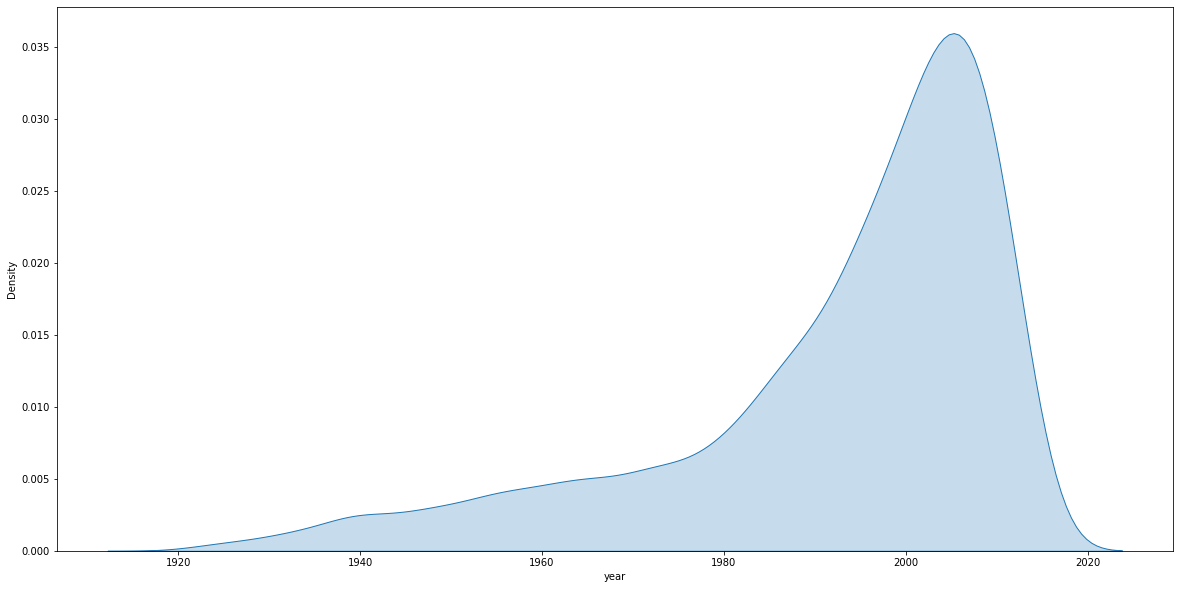

In [256]:
plt.figure(figsize=(20, 10))
sns.kdeplot(x="year", data=year_data_df, fill=True)


### writers

In [56]:
writers_data_df

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [64]:
print("작가의 수 : ", writers_data_df["writer"].nunique())

작가의 수 :  2989


In [67]:
print("영화의 수 : ", writers_data_df["item"].nunique())

영화의 수 :  5648


In [118]:
print("영화를 가장 많이 집필한 작가 순위")
writers_data_df["writer"].value_counts().sort_values(ascending=False)

영화를 가장 많이 집필한 작가 순위


nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0957652     2
nm0957205     2
nm0793881     2
nm0954664     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [128]:
print("가장 많은 작가들이 집필한 영화 순위")
pd.merge(writers_data_df, titles_data_df, on=["item"]).value_counts(["item", "title"]).sort_values(ascending=False)

가장 많은 작가들이 집필한 영화 순위


item   title                              
1907   Mulan (1998)                           24
783    Hunchback of Notre Dame, The (1996)    23
2687   Tarzan (1999)                          21
364    Lion King, The (1994)                  21
6889   Brother Bear (2003)                    19
                                              ..
84601  Unknown (2011)                          1
91233  Lifted (2006)                           1
74868  Dorian Gray (2009)                      1
91414  Arthur Christmas (2011)                 1
6409   Bend of the River (1952)                1
Length: 5648, dtype: int64

### directors

In [70]:
directors_data_df

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


In [77]:
print("감독의 수 : ", directors_data_df["director"].nunique())

감독의 수 :  1340


In [78]:
print("영화의 수 : ", directors_data_df["item"].nunique())

영화의 수 :  5503


In [131]:
print("영화에 가장 많이 참여한 감독 순위")
directors_data_df["director"].value_counts().sort_values(ascending=False)

영화에 가장 많이 참여한 감독 순위


nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0146341     2
nm0145336     2
nm0138927     2
nm0138893     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [132]:
print("감독들이 가장 많이 참여한 영화 순위")
pd.merge(directors_data_df, titles_data_df, on=["item"]).value_counts(["item", "title"]).sort_values(ascending=False)

감독들이 가장 많이 참여한 영화 순위


item    title                                      
50912   Paris, I Love You (Paris, je t'aime) (2006)    14
1282    Fantasia (1940)                                10
27002   From the Earth to the Moon (1998)               8
71823   New York, I Love You (2009)                     7
596     Pinocchio (1940)                                7
                                                       ..
93265   Courageous (2011)                               1
93272   Dr. Seuss' The Lorax (2012)                     1
93287   Big Year, The (2011)                            1
93297   Act of Valor (2012)                             1
119145  Kingsman: The Secret Service (2015)             1
Length: 5503, dtype: int64

### titles

In [71]:
titles_data_df

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [85]:
print("영화의 수 : ", titles_data_df["item"].nunique())

영화의 수 :  6807


### genres

In [72]:
genres_data_df

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [86]:
print("장르의 수 : ", genres_data_df["genre"].nunique())

장르의 수 :  18


In [87]:
print("영화의 수 : ", genres_data_df["item"].nunique())

영화의 수 :  6807


In [89]:
print("가장 많은 장르를 가지고 있는 영화 순위")
genres_data_df["item"].value_counts().sort_values(ascending=False)

가장 많은 장르를 가지고 있는 영화 순위


81132    10
26701     8
1907      7
6902      7
43932     7
         ..
921       1
4021      1
58351     1
3224      1
8130      1
Name: item, Length: 6807, dtype: int64

In [90]:
print("영화 장르 순위")
genres_data_df["genre"].value_counts().sort_values(ascending=False)

영화 장르 순위


Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: genre, dtype: int64

<AxesSubplot:>

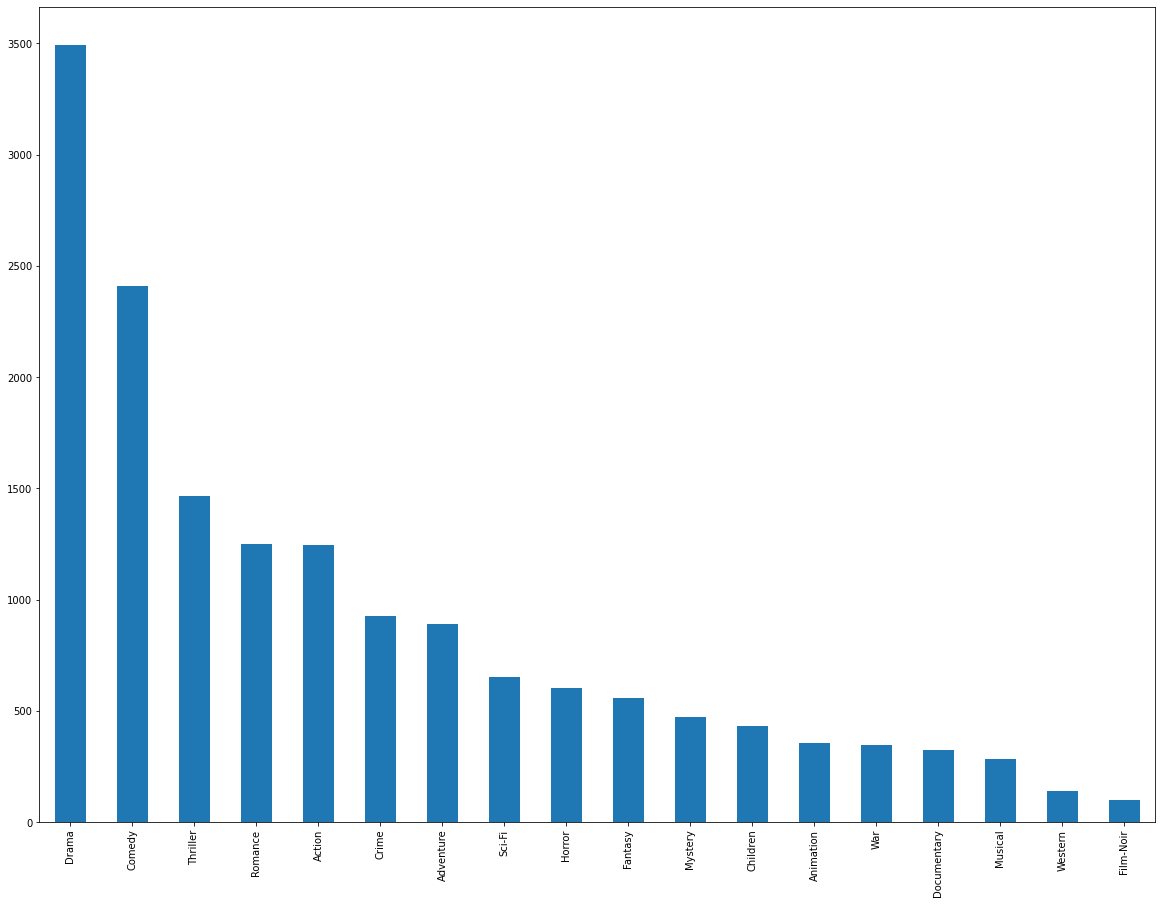

In [16]:
plt.figure(figsize=(20,15))
genres_data_df["genre"].value_counts().plot(kind="bar")

## training set + side information

### training set + titles

In [165]:
training_titles = pd.merge(train_df, titles_data_df, how="left", on=["item"])
training_titles

,user,item,time,title
0,11,4643,1230782529,Planet of the Apes (2001)
1,11,170,1230782534,Hackers (1995)
2,11,531,1230782539,"Secret Garden, The (1993)"
3,11,616,1230782542,"Aristocats, The (1970)"
4,11,2140,1230782563,"Dark Crystal, The (1982)"
...,...,...,...,...
5154466,138493,44022,1260209449,Ice Age 2: The Meltdown (2006)
5154467,138493,4958,1260209482,Behind Enemy Lines (2001)
5154468,138493,68319,1260209720,X-Men Origins: Wolverine (2009)
5154469,138493,40819,1260209726,Walk the Line (2005)


In [168]:
training_titles[training_titles["title"].isnull()] # training set-title merge에는 null값이 없다

,user,item,time,title


### training set + director

In [158]:
training_director = pd.merge(train_df, directors_data_df, how="left", on=["item"])
training_director

,user,item,time,director
0,11,4643,1230782529,nm0000318
1,11,170,1230782534,nm0812200
2,11,531,1230782539,nm0002140
3,11,616,1230782542,nm0718627
4,11,2140,1230782563,nm0000568
...,...,...,...,...
5708948,138493,44022,1260209449,nm0757858
5708949,138493,4958,1260209482,nm0601382
5708950,138493,68319,1260209720,nm0004303
5708951,138493,40819,1260209726,nm0003506


In [222]:
print("사람들이 가장 많이 시청한 영화의 감독 순위")
training_director["director"].value_counts().sort_values(ascending=False)

사람들이 가장 많이 시청한 영화의 감독 순위


nm0000229    130434
nm0000233     81880
nm0634240     65526
nm0000709     63374
nm0001392     60938
              ...  
nm0070159       103
nm0788454        99
nm0001674        97
nm0443181        96
nm0921631        96
Name: director, Length: 1340, dtype: int64

In [161]:
training_director[training_director["director"].isnull()]
# => training set-derector merge에는 null값이 있다

,user,item,time,director
11,11,1591,1230782724,NaN
58,11,2793,1230784958,NaN
59,11,33085,1230785024,NaN
72,11,31184,1230785400,NaN
73,11,34338,1230785494,NaN
...,...,...,...,...
5708895,138493,8604,1257785495,NaN
5708929,138493,50601,1258390414,NaN
5708930,138493,224,1258390437,NaN
5708937,138493,61160,1258390537,NaN


In [200]:
print("감독의 정보가 없는 영화들")
training_director[training_director["director"].isnull()]["item"].unique() 

감독의 정보가 없는 영화들


array([ 1591,  2793, 33085, ...,   842,  5999, 93422])

In [201]:
training_director[training_director["director"].isnull()]["item"].nunique() 

1304

In [188]:
training_director[training_director["director"].isnull()]["item"].value_counts().sort_values(ascending=False)

1073     6495
8784     5328
7254     4919
4246     3340
1500     2984
         ... 
27619      40
1389       39
7259       38
4241       34
51372      27
Name: item, Length: 1304, dtype: int64

In [175]:
directors_data_df[directors_data_df["item"]==1073]

,item,director


### training set + genres

In [181]:
training_genres = pd.merge(train_df, genres_data_df, how="left", on=["item"])
training_genres

,user,item,time,genre
0,11,4643,1230782529,Action
1,11,4643,1230782529,Adventure
2,11,4643,1230782529,Drama
3,11,4643,1230782529,Sci-Fi
4,11,170,1230782534,Action
...,...,...,...,...
14126319,138493,27311,1260209807,Action
14126320,138493,27311,1260209807,Animation
14126321,138493,27311,1260209807,Crime
14126322,138493,27311,1260209807,Sci-Fi


In [218]:
print("사람들이 좋아하는 장르 순위")
training_genres["genre"].value_counts().sort_values(ascending=False)

사람들이 좋아하는 장르 순위


Drama          2511407
Comedy         1719017
Action         1504902
Thriller       1435678
Adventure      1203283
Crime          1014480
Romance         893843
Sci-Fi          857851
Fantasy         617807
Mystery         493005
Children        397929
Animation       370761
Horror          343730
War             307170
Musical         199635
Western          95374
Documentary      90050
Film-Noir        70402
Name: genre, dtype: int64

<AxesSubplot:>

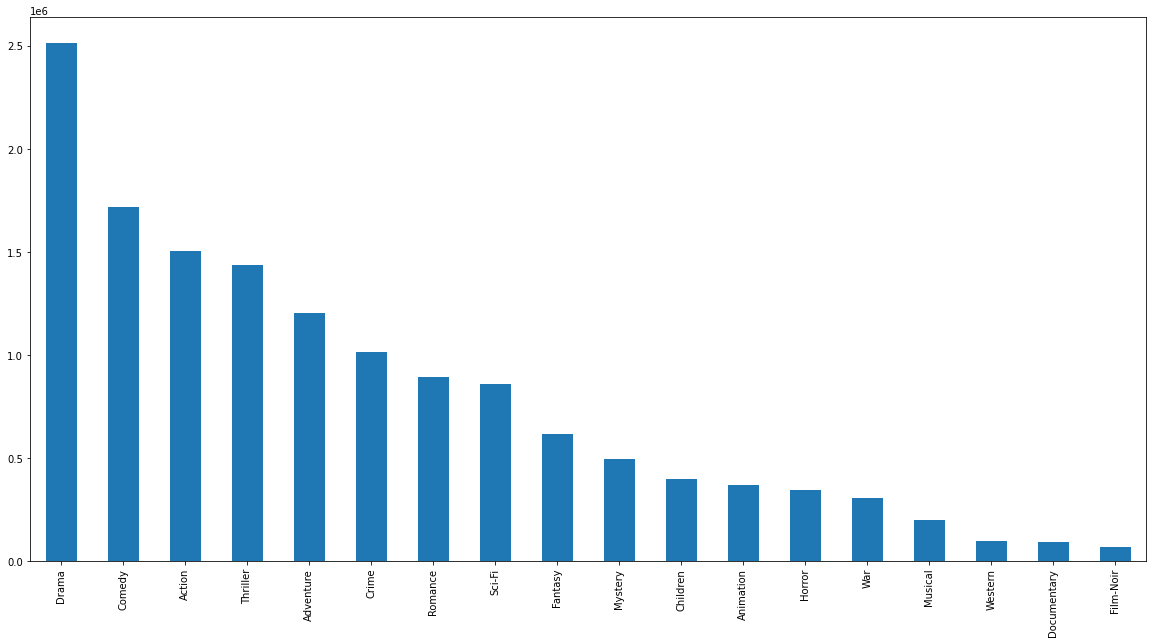

In [235]:
plt.figure(figsize=(20, 10))
training_genres["genre"].value_counts().plot(kind="bar")

In [182]:
training_genres[training_genres["genre"].isnull()]
# => training set-genres에는 null값이 없다

,user,item,time,genre


### training set + writers

In [184]:
training_writers = pd.merge(train_df, writers_data_df, how="left", on=["item"])
training_writers

,user,item,time,writer
0,11,4643,1230782529,nm0099541
1,11,4643,1230782529,nm0115310
2,11,4643,1230782529,nm0465199
3,11,4643,1230782529,nm0742797
4,11,170,1230782534,NaN
...,...,...,...,...
11591602,138493,68319,1260209720,nm1125275
11591603,138493,40819,1260209726,nm0003506
11591604,138493,40819,1260209726,nm0219456
11591605,138493,27311,1260209807,nm0004170


In [221]:
print("사람들이 가장 많이 시청한 영화의 작가 순위")
training_writers["writer"].value_counts().sort_values(ascending=False)

사람들이 가장 많이 시청한 영화의 작가 순위


nm0000184    96994
nm0000233    80361
nm0634240    64298
nm0001392    60938
nm0909638    60245
             ...  
nm0788454       99
nm0921631       96
nm0540532       94
nm0639434       94
nm0818746       85
Name: writer, Length: 2989, dtype: int64

In [196]:
training_writers[training_writers["writer"].isnull()]
# => training set-writers에는 null값이 있다

,user,item,time,writer
4,11,170,1230782534,NaN
58,11,5151,1230783478,NaN
61,11,33585,1230783564,NaN
120,11,1225,1230784460,NaN
122,11,59418,1230784666,NaN
...,...,...,...,...
11591191,138493,8905,1255856919,NaN
11591192,138493,52579,1255856957,NaN
11591475,138493,1429,1256854805,NaN
11591494,138493,1298,1258134713,NaN


In [187]:
print("작가의 정보가 없는 영화들")
training_writers[training_writers["writer"].isnull()]["item"].unique() 

작가의 정보가 없는 영화들


array([  170,  5151, 33585, ..., 90524, 75395,  6864])

In [202]:
training_writers[training_writers["writer"].isnull()]["item"].nunique() 

1159

In [189]:
training_writers[training_writers["writer"].isnull()]["item"].value_counts().sort_values(ascending=False)

590      6431
1225     5722
8784     5328
47610    4591
44665    4318
         ... 
65193      41
414        40
7259       38
4241       34
51372      27
Name: item, Length: 1159, dtype: int64

In [190]:
writers_data_df[writers_data_df["item"]==590]

,item,writer


### training set + years

In [250]:
training_years = pd.merge(train_df, year_data_df, how="left", on=["item"])
training_years

,user,item,time,year
0,11,4643,1230782529,2001.0
1,11,170,1230782534,1995.0
2,11,531,1230782539,1993.0
3,11,616,1230782542,1970.0
4,11,2140,1230782563,1982.0
...,...,...,...,...
5154466,138493,44022,1260209449,2006.0
5154467,138493,4958,1260209482,2001.0
5154468,138493,68319,1260209720,2009.0
5154469,138493,40819,1260209726,2005.0


In [251]:
print("사람들이 가장 많이 시청한 영화의 년도")
training_years["year"].value_counts().sort_values(ascending=False)

사람들이 가장 많이 시청한 영화의 년도


2004.0    272242
1999.0    231320
2001.0    224178
2002.0    220123
2006.0    215314
           ...  
1928.0      1208
1929.0      1063
1926.0       910
1924.0       781
1923.0       352
Name: year, Length: 93, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Density'>

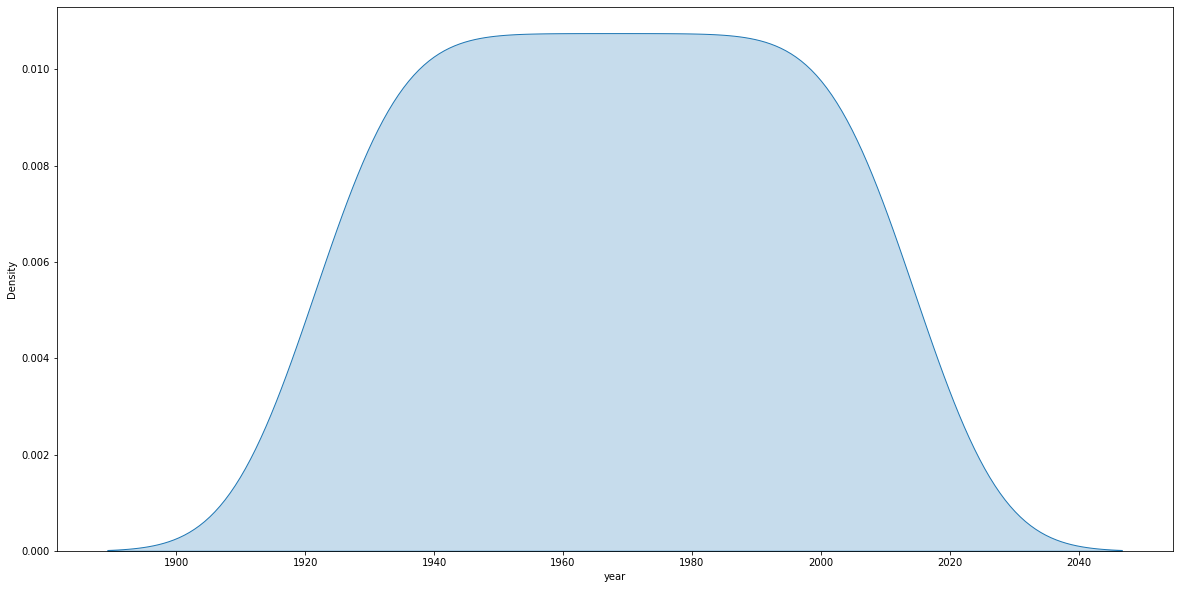

In [259]:
plt.figure(figsize=(20, 10))
training_years_tmp = training_years["year"].value_counts().to_frame().reset_index()
training_years_tmp.columns = ["year", "count"]
sns.kdeplot(x="year", data=training_years_tmp, fill=True)

In [194]:
training_years[training_years["year"].isnull()]
# => training set-year에는 null값이 있다

,user,item,time,year
3486,132,6987,1114010962,NaN
13645,413,6987,1128709337,NaN
14766,425,3310,1418071653,NaN
15678,448,6987,1128537722,NaN
19598,563,6987,1171575158,NaN
...,...,...,...,...
5147569,138325,8511,1268938902,NaN
5147629,138325,7065,1279124995,NaN
5150507,138406,3310,1139933369,NaN
5150755,138406,32898,1372717892,NaN


In [198]:
print("년도의 정보가 없는 영화들")
training_years[training_years["year"].isnull()]["item"].unique() 

년도의 정보가 없는 영화들


array([  6987,   3310,   7243,   8511,  32898,   7065, 119145,   6988])

In [203]:
training_years[training_years["year"].isnull()]["item"].nunique() 
# => 이 정도 비어진 정보면 채워넣을 수 있다.

8

In [204]:
training_years[training_years["year"].isnull()]["item"].value_counts().sort_values(ascending=False)

6987      763
3310      480
32898     183
7065      109
7243       78
119145     78
8511       71
6988       70
Name: item, dtype: int64

In [205]:
training_side_inform = pd.merge(train_df, titles_data_df, how="left", on=["item"])
training_side_inform = pd.merge(training_side_inform, genres_data_df, how="left", on=["item"])
training_side_inform = pd.merge(training_side_inform, year_data_df, how="left", on=["item"])
training_side_inform = pd.merge(training_side_inform, directors_data_df, how="left", on=["item"])
training_side_inform = pd.merge(training_side_inform, writers_data_df, how="left", on=["item"])
training_side_inform

,user,item,time,title,genre,year,director,writer
0,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0099541
1,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0115310
2,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0465199
3,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0742797
4,11,4643,1230782529,Planet of the Apes (2001),Adventure,2001.0,nm0000318,nm0099541
...,...,...,...,...,...,...,...,...
48264326,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Crime,2000.0,NaN,nm0227704
48264327,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Sci-Fi,2000.0,NaN,nm0004170
48264328,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Sci-Fi,2000.0,NaN,nm0227704
48264329,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Thriller,2000.0,NaN,nm0004170


In [211]:
training_side_inform_null = training_side_inform[training_side_inform["year"].isnull() | training_side_inform["director"].isnull() | training_side_inform["writer"].isnull()]
training_side_inform_null

,user,item,time,title,genre,year,director,writer
16,11,170,1230782534,Hackers (1995),Action,1995.0,nm0812200,NaN
17,11,170,1230782534,Hackers (1995),Adventure,1995.0,nm0812200,NaN
18,11,170,1230782534,Hackers (1995),Crime,1995.0,nm0812200,NaN
19,11,170,1230782534,Hackers (1995),Thriller,1995.0,nm0812200,NaN
72,11,1591,1230782724,Spawn (1997),Action,1997.0,NaN,nm0568416
...,...,...,...,...,...,...,...,...
48264326,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Crime,2000.0,NaN,nm0227704
48264327,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Sci-Fi,2000.0,NaN,nm0004170
48264328,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Sci-Fi,2000.0,NaN,nm0227704
48264329,138493,27311,1260209807,Batman Beyond: Return of the Joker (2000),Thriller,2000.0,NaN,nm0004170


In [215]:
training_side_inform_notnull =training_side_inform[training_side_inform["year"].notnull() & training_side_inform["director"].notnull() & training_side_inform["writer"].notnull()]
training_side_inform_notnull

,user,item,time,title,genre,year,director,writer
0,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0099541
1,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0115310
2,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0465199
3,11,4643,1230782529,Planet of the Apes (2001),Action,2001.0,nm0000318,nm0742797
4,11,4643,1230782529,Planet of the Apes (2001),Adventure,2001.0,nm0000318,nm0099541
...,...,...,...,...,...,...,...,...
48264316,138493,40819,1260209726,Walk the Line (2005),Drama,2005.0,nm0003506,nm0219456
48264317,138493,40819,1260209726,Walk the Line (2005),Musical,2005.0,nm0003506,nm0003506
48264318,138493,40819,1260209726,Walk the Line (2005),Musical,2005.0,nm0003506,nm0219456
48264319,138493,40819,1260209726,Walk the Line (2005),Romance,2005.0,nm0003506,nm0003506


In [18]:
titles_data_df[titles_data_df["title"].str.contains('Batman')]

,item,title
22,33794,Batman Begins (2005)
107,592,Batman (1989)
455,1377,Batman Returns (1992)
3112,79274,Batman: Under the Red Hood (2010)
3352,80469,Superman/Batman: Apocalypse (2010)
3443,153,Batman Forever (1995)
3600,1562,Batman & Robin (1997)
3673,3213,Batman: Mask of the Phantasm (1993)
3696,26152,Batman (1966)
3754,60979,Batman: Gotham Knight (2008)


In [264]:
# baselined
pd.merge(titles_data_df[titles_data_df["title"].str.contains('Batman')], genres_data_df)
# 장르+작가+감독 => 비슷한 시리즈 추천 => 클러스터링 해볼사람 해보기

,item,title,genre
0,33794,Batman Begins (2005),Action
1,33794,Batman Begins (2005),Crime
2,592,Batman (1989),Action
3,592,Batman (1989),Crime
4,592,Batman (1989),Thriller
5,1377,Batman Returns (1992),Action
6,1377,Batman Returns (1992),Crime
7,79274,Batman: Under the Red Hood (2010),Action
8,79274,Batman: Under the Red Hood (2010),Animation
9,80469,Superman/Batman: Apocalypse (2010),Animation
